In [1]:
#import the packages
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import ta

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
today = date.today()
ticker1 = 'AAPL' 
start_date = '2019-01-02'
end = today
df = pdr.get_data_yahoo(ticker1, start=start_date, end=today)
df['RSI'] = ta.momentum.rsi(df.Close, window=14)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793785,148158800,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029240,365248800,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481918,234428400,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200,NaN
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077843,164101200,NaN
...,...,...,...,...,...,...,...
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100,76.132520
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700,78.741969
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600,68.582565


In [3]:
df1 = df.iloc[-960:].copy()
df1

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2020-09-18,110.400002,110.879997,106.089996,106.839996,104.529671,287104900,38.974528
2020-09-21,104.540001,110.190002,103.099998,110.080002,107.699623,195713800,43.831963
2020-09-22,112.680000,112.860001,109.160004,111.809998,109.392212,183055400,46.290252
2020-09-23,111.620003,112.110001,106.769997,107.120003,104.803650,150718700,41.045539
2020-09-24,105.169998,110.250000,105.000000,108.220001,105.879845,167743300,42.685749
...,...,...,...,...,...,...,...
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100,76.132520
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700,78.741969
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600,68.582565


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13620\680901132.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df1.RSI[x] >= 40:
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13620\680901132.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arrayRSI.append(df1.Close[x])
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13620\680901132.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df1.RSI[x] <= 75:
C:\Users\Gustavo\Ap

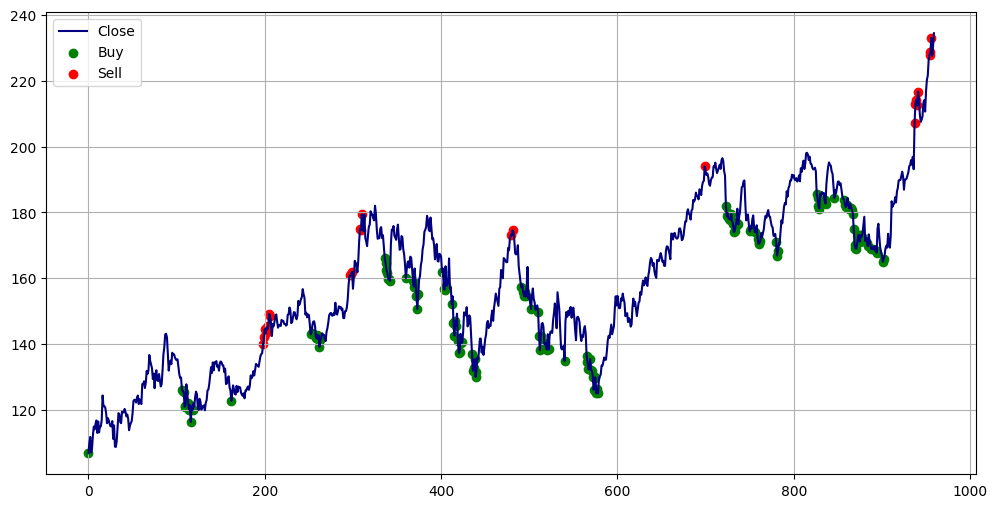

In [14]:
import pylab as pl
from matplotlib import collections  as mc

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

#lista scatter buy
arrayRSI = []
for x in range(len(df1)):
    if df1.RSI[x] >= 40:
        arrayRSI.append(np.nan)
    else:
        arrayRSI.append(df1.Close[x])

sellRSI = []
for x in range(len(df1)):
    if df1.RSI[x] <= 75:
        sellRSI.append(np.nan)
    else:
        sellRSI.append(df1.Close[x])


XX = [x for x in range(len(df1))]
yt1 = [x for x in df1.Close]

pl.plot(XX, yt1, color = 'navy', label='Close')
pl.scatter(XX, arrayRSI, color = 'green', label='Buy')
pl.scatter(XX, sellRSI, color = 'red', label='Sell')
pl.legend()
pl.grid(True)
pl.show();

In [12]:
df1.index[0].strftime('%Y-%m-%d')

'2020-09-18'

In [5]:
yt2

[38.97452752374402,
 43.83196311887617,
 46.29025235601651,
 41.045539477276876,
 42.68574850603933,
 48.39279298518085,
 51.80433235567088,
 50.6341487519406,
 52.89935423379652,
 54.189184282403836,
 48.66781905402992,
 53.3889421651177,
 48.75426747934398,
 51.36781973196892,
 51.2066887184842,
 54.03014289569743,
 62.67186446697259,
 57.501551066876345,
 57.60428129457841,
 56.81549515309958,
 54.01124692807052,
 49.2977152964747,
 51.58764210061171,
 50.55899672664512,
 48.72785684715055,
 47.552103586500664,
 47.57129591481817,
 50.58879645296738,
 41.60479574132339,
 49.04060140210888,
 40.36210823678354,
 40.25522129856749,
 43.257823467757575,
 50.49384356321936,
 55.9647946067797,
 55.415214252094415,
 51.61056853250249,
 51.05311402922125,
 56.17947457159023,
 55.679921918325775,
 55.755585536493776,
 57.385142415081816,
 55.46033337600575,
 52.61968749817494,
 53.763604309172024,
 50.940921340910315,
 44.2276652680384,
 47.06892219941491,
 48.89559040767654,
 50.10311076551